# Machine Problem 2 - Color Manipulation
### Submitted by: Darius Vincent Ardales | DIGIMAP - S13

# Dependencies

In [44]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
from collections import Counter

# For reproducibility
np.random.seed(42)

# Data Preparation

### Helper Functions

In [45]:
# Function to fetch images from a public GitHub repository folder
def fetch_images(base_url, image_names):
    images = []
    
    for image_name in image_names:
        raw_url = f'{base_url}/{image_name}'
        response = requests.get(raw_url)

        if response.status_code == 200:
            image_data = np.frombuffer(response.content, np.uint8)
            img = cv.imdecode(image_data, cv.IMREAD_COLOR)
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

            images.append(img_rgb)
        else:
            print(f"Failed to download {image_name}")
    
    return images

In [46]:
# Function to read all images from a directory and store them in a list
def read_images_from_dir(dir_path):
    images = []
    
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)
        
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img = cv.imread(file_path)
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            
            images.append(img_rgb)
    
    return images

In [47]:
# Function to take an image list and displays them
def display_images(images, columns=5):
    rows = (len(images) + columns - 1) // columns

    plt.figure(figsize=(15, rows * 3))
    
    for i, img in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(img)
    
    plt.tight_layout()
    plt.show()

In [48]:
# Function to create pixel image with the given RGB values
def display_color_hsv(hsv):
    # Create a color patch with the given HSV values
    color_patch_hsv = np.ones((10, 10, 3), dtype=np.uint8) * np.array(hsv, dtype=np.uint8)
    color_patch_rgb = cv.cvtColor(color_patch_hsv, cv.COLOR_HSV2RGB)
    
    plt.figure(figsize=(1, 1))
    plt.imshow(color_patch_rgb)
    plt.axis('off')
    plt.show()

In [49]:
# Function to calculate brightness using the V channel of the HSV color space
def calculate_brightness(img):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    return np.mean(img_hsv[:, :, 2])  # V channel

In [50]:
# Function to apply gamma correction to an image
def gamma_correction(img, gamma):
	lookUpTable = np.empty((1, 256), np.uint8)
	for i in range(256):
		lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
	return cv.LUT(img, lookUpTable)

In [51]:
# Function to visualize image difference
def image_difference(img1, img2, title1, title2):
    if img1.shape != img2.shape:
        raise ValueError("Both images must have the same dimensions.")

    diff = cv.absdiff(img1, img2)

    plt.figure(figsize=(10, 7))

    plt.subplot(1, 3, 1)
    plt.imshow(img1)
    plt.title(title1)

    plt.subplot(1, 3, 2)
    plt.imshow(img2)
    plt.title(title2)

    plt.subplot(1, 3, 3)
    plt.imshow(diff)
    plt.title('Difference')

    plt.show()

### Loading the Data

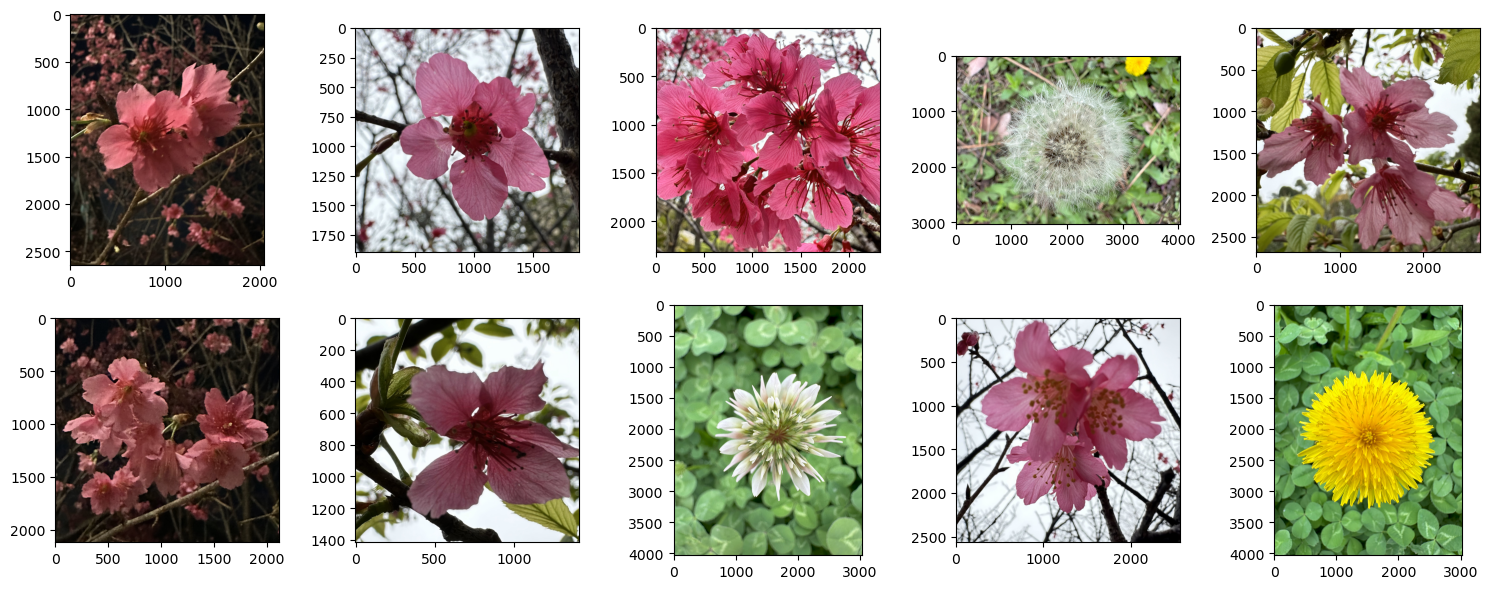

In [52]:
base_url = "https://raw.githubusercontent.com/dyjdlopez/fund-dip/main/media/dataset2"
image_names = [
    '0001.jpg', '0002.jpg', '0003.jpg', '0007.jpg', '0008.jpg',
    '0009.jpg', '0010.jpg', '0011.jpg', '0020.jpg', '0030.jpg'
]

images = fetch_images(base_url, image_names)
display_images(images)

# Information Extraction

Given the image dataset:
- Reshape the images to (100,100,3)
- Save the transformed images as JPEG files in a separate directory.
- Create a histogram for the following channels:
  - Reds
  - Greens
  - Blues
  - Hues
  - Saturations
  - Intensities

In [53]:
# Function to resize all images in a list to a given size
def resize_and_save_images(images, output_dir, size=(100, 100)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, img in enumerate(images):
        # Resize the image to the specified size (100x100 by default)
        # Uses cv2.INTER_LINEAR interpolation by default
        resized_img = cv.resize(img, size)

        output_path = os.path.join(output_dir, f'resized_{i}.jpg')
        
        # Convert back to BGR before saving
        img_bgr = cv.cvtColor(resized_img, cv.COLOR_RGB2BGR)

        # Save the image as a JPEG file
        cv.imwrite(output_path, img_bgr)  

    print(f"All images have been resized and saved to {output_dir}")

In [54]:
# Check the shapes of the images
for image in images:
  print(image.shape)

(2648, 2045, 3)
(1892, 1892, 3)
(2317, 2317, 3)
(3024, 4032, 3)
(2679, 2679, 3)
(2113, 2113, 3)
(1414, 1414, 3)
(4032, 3024, 3)
(2559, 2559, 3)
(4032, 3024, 3)


In [55]:
# Reshape the images to (100,100,3) and save them in a separate directory
output_dir = "resized_images"

resize_and_save_images(images, output_dir)

All images have been resized and saved to resized_images


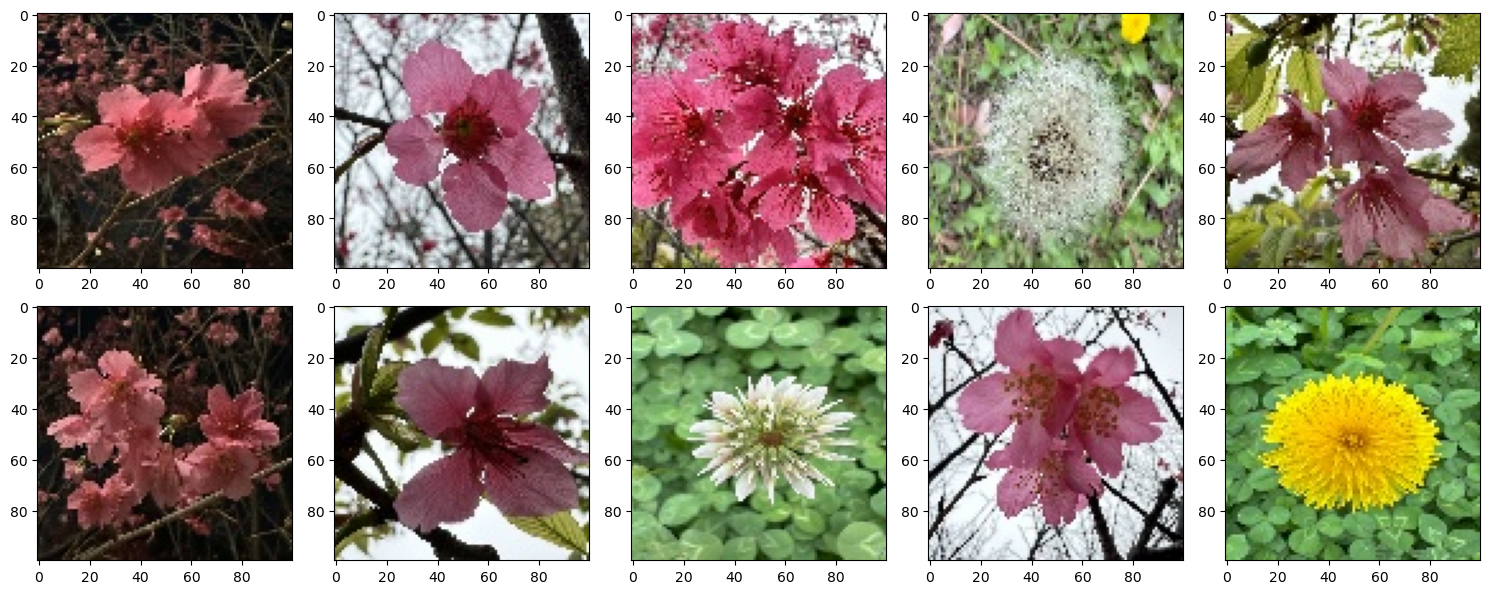

In [56]:
# Display the resized images
resized_images = read_images_from_dir(output_dir)
display_images(resized_images)

In [57]:
# Check the shapes of the resized images
for image in resized_images:
  print(image.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


### Histograms for RGB

In [58]:
# Function to plot RGB histograms based on a given image
def plot_rgb_histograms(image):
    r, g, b = cv.split(image)
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.hist(r.ravel(), 256, [0, 256], color='red', alpha=0.6)
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 2)
    plt.hist(g.ravel(), 256, [0, 256], color='green', alpha=0.6)
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 3)
    plt.hist(b.ravel(), 256, [0, 256], color='blue', alpha=0.6)
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 4)
    plt.hist(r.ravel(), 256, [0, 256], color='red', alpha=0.6, label='Red')
    plt.hist(g.ravel(), 256, [0, 256], color='green', alpha=0.6, label='Green')
    plt.hist(b.ravel(), 256, [0, 256], color='blue', alpha=0.6, label='Blue')
    plt.title('Combined RGB Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

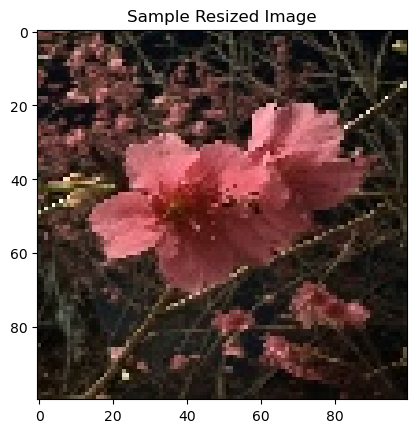

In [59]:
# Sample
plt.imshow(resized_images[0])
plt.title('Sample Resized Image')
plt.show()

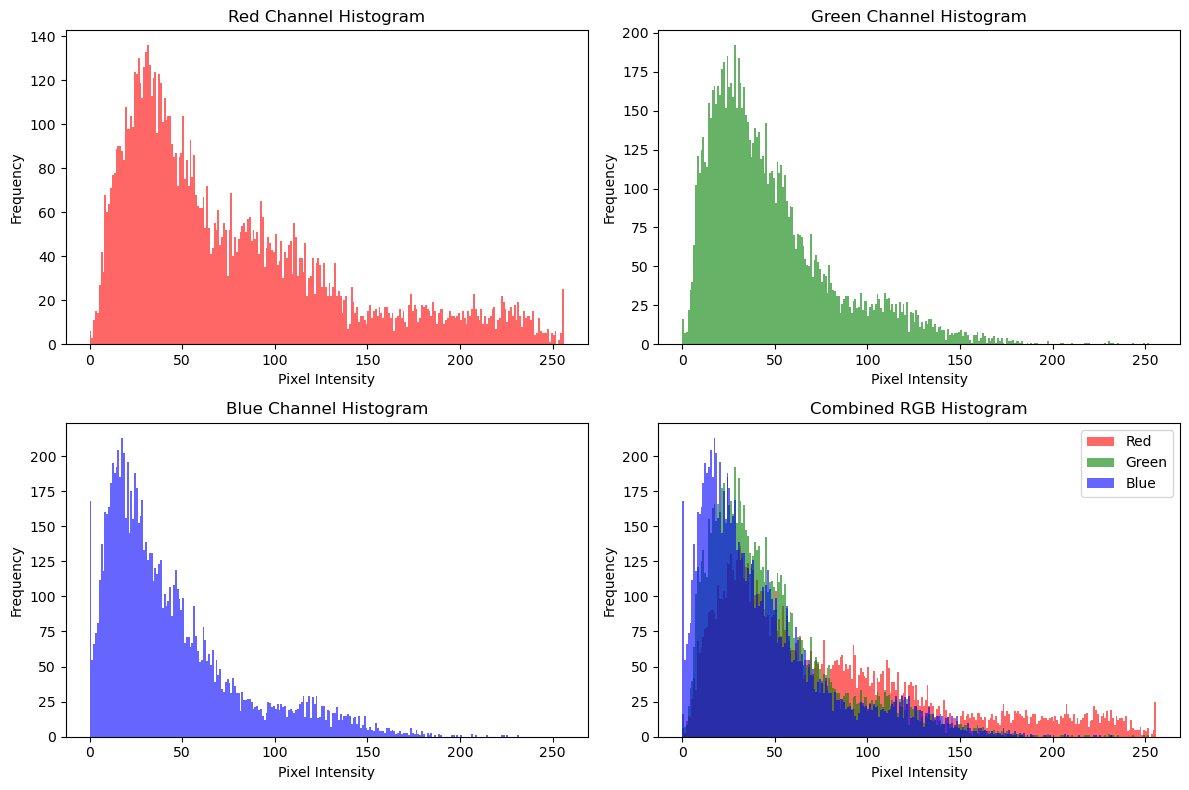

In [60]:
# Show RGB Histograms
plot_rgb_histograms(resized_images[0])

### Histograms for HSL

In [61]:
# Function to plot HSV histograms based on a given image
def plot_hsv_histograms(image):
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(hsv_image)
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.hist(h.ravel(), 256, [0, 256], color='orange', alpha=0.6)
    plt.title('Hue Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 2)
    plt.hist(s.ravel(), 256, [0, 256], color='green', alpha=0.6)
    plt.title('Saturation Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 3)
    plt.hist(v.ravel(), 256, [0, 256], color='blue', alpha=0.6)
    plt.title('Value Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 4)
    plt.hist(h.ravel(), 256, [0, 256], color='orange', alpha=0.6, label='Hue')
    plt.hist(s.ravel(), 256, [0, 256], color='green', alpha=0.6, label='Saturation')
    plt.hist(v.ravel(), 256, [0, 256], color='blue', alpha=0.6, label='Value')
    plt.title('Combined HSV Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

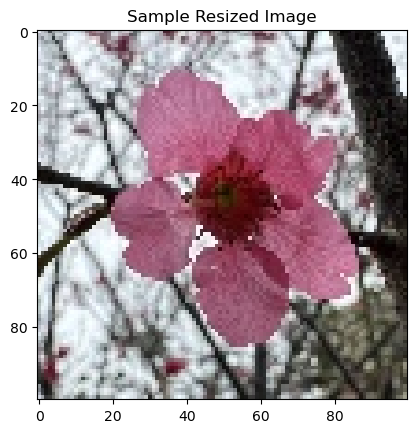

In [62]:
# Sample
plt.imshow(resized_images[1])
plt.title('Sample Resized Image')
plt.show()

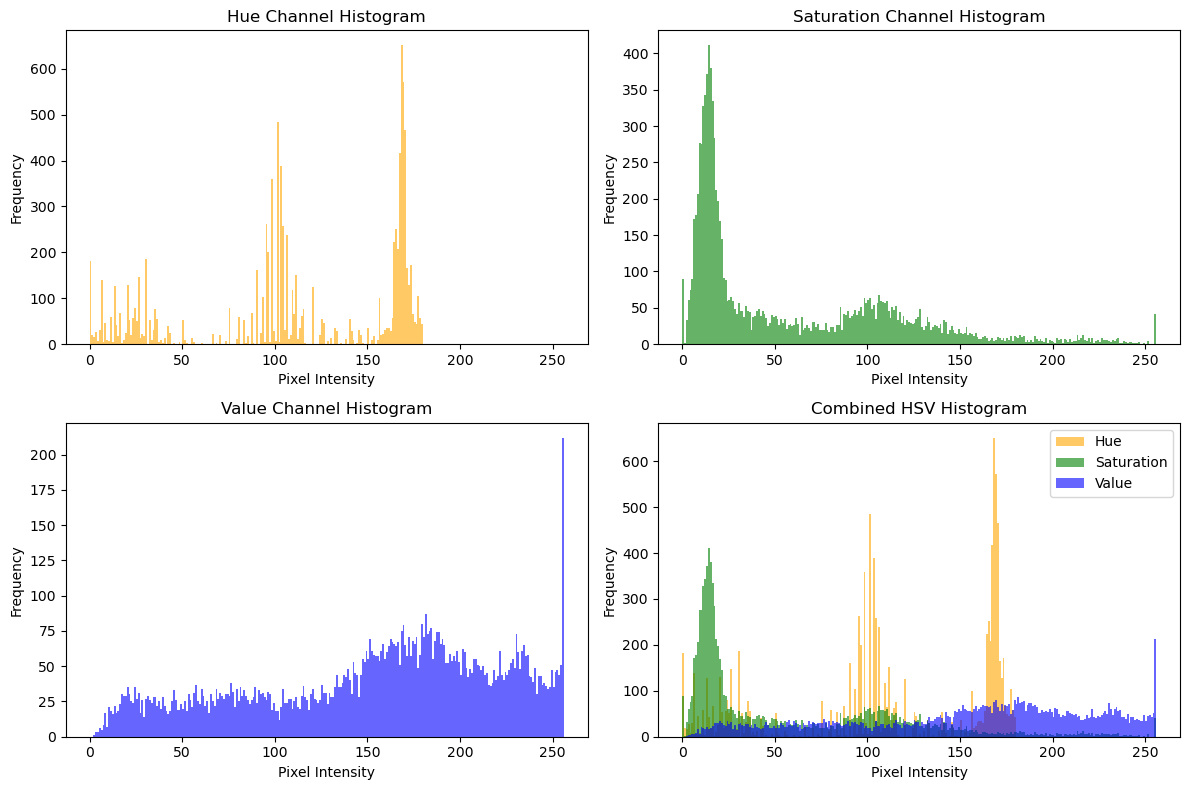

In [63]:
# Show HSV Histograms
plot_hsv_histograms(resized_images[1])

# Guide Questions

### 1. In the RGB space, which channel is most likely to be observed for all images?

In [64]:
# Function to get the most likely observed channel in the RGB space
def most_observed_channel_rgb(images):
    red_total = 0
    green_total = 0
    blue_total = 0
    num_images = len(images)

    # Iterate through all images and sum their averages first
    for image in images:
        r, g, b = cv.split(image)
        
        red_avg = np.mean(r)
        green_avg = np.mean(g)
        blue_avg = np.mean(b)
        
        red_total += red_avg
        green_total += green_avg
        blue_total += blue_avg

    # Calculate the average intensity for each channel across all images
    red_final_avg = red_total / num_images
    green_final_avg = green_total / num_images
    blue_final_avg = blue_total / num_images

    # Find the channel with the highest average intensity
    if red_final_avg > green_final_avg and red_final_avg > blue_final_avg:
        most_observed = 'Red'
    elif green_final_avg > red_final_avg and green_final_avg > blue_final_avg:
        most_observed = 'Green'
    else:
        most_observed = 'Blue'
    
    return most_observed, red_final_avg, green_final_avg, blue_final_avg

In [65]:
most_observed_rgb, red_avg, green_avg, blue_avg = most_observed_channel_rgb(resized_images)
print(f'Most observed channel in the RGB Space: {most_observed_rgb}')
print(f'Red average: {red_avg:.4f}, Green average: {green_avg:.4f}, Blue average: {blue_avg:.4f}')

Most observed channel in the RGB Space: Red
Red average: 132.2859, Green average: 116.4520, Blue average: 97.5179


> The channel most likely to be observed for all images in the RGB Space is `Red`

### 2. In the HSV space, which top three hues are most likely to be observed for all images?

In [66]:
# Function to get the top k hues that are most likely to be observed for all images in the HSV space
def get_top_hues(images, top_k=3, visualize=False):
    hue_values = []
    
    for image in images:
        hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
        h, _, _ = cv.split(hsv_image)
        
        # Flatten the Hue channel and add to the hue_values list
        hue_values.extend(h.ravel())
    
    # Use Counter to count the frequency of each Hue value
    hue_counter = Counter(hue_values)
    
    # Get the top k most common Hue values
    top_hues = hue_counter.most_common(top_k)

    # Visualize the top hues
    if visualize:
        plt.figure(figsize=(8, 2))
    
        for i, (hue, count) in enumerate(top_hues):
            # Normalize hue to the OpenCV HSV range (0-179)
            hue_image = np.full((50, 50, 3), (hue, 255, 255), dtype=np.uint8) # Saturation=255, Value=255
            rgb_image = cv.cvtColor(hue_image, cv.COLOR_HSV2RGB)
            
            # Plot the color patch
            plt.subplot(1, top_k, i + 1)
            plt.imshow(rgb_image)
            plt.title(f'Hue: {hue}\nFreq: {count}')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    return top_hues

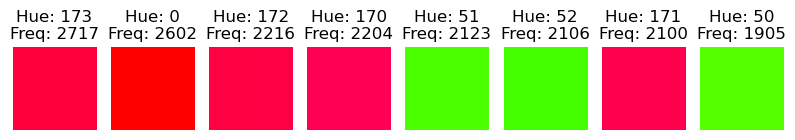

Top 1: Hue = 173, Frequency = 2717
Top 2: Hue = 0, Frequency = 2602
Top 3: Hue = 172, Frequency = 2216
Top 4: Hue = 170, Frequency = 2204
Top 5: Hue = 51, Frequency = 2123
Top 6: Hue = 52, Frequency = 2106
Top 7: Hue = 171, Frequency = 2100
Top 8: Hue = 50, Frequency = 1905


In [67]:
top_hues = get_top_hues(resized_images, 8, True)
for i, (hue, freq) in enumerate(top_hues, start=1):
    print(f"Top {i}: Hue = {hue}, Frequency = {freq}")

> The top 3 hues that are most likely to be observed for all images is `173, 0, and 172`

# Data Cleaning

Develop a function that attains the following activities:
- Remove all images that are taken during the night.
- Remove all images that are not pink flowers.

### Remove all images that are taken during the night

References
- [Simple Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)

In [68]:
# Function to remove images most likely taken during the night
def remove_night_images(images, inplace=False):

    # Function to check if an image is taken during the day based on automatically determined brightness threshold
    def is_daytime(image):
        hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
        _, _, v = cv.split(hsv_image)
        
        # Global Thresholding
        threshold, _ = cv.threshold(v, 127, 255, cv.THRESH_BINARY)
        
        # Calculate the mean brightness (V channel)
        mean_brightness = np.mean(v)
        
        # Use the dynamically determined threshold to decide if the image is bright enough
        return mean_brightness > threshold

    # Process images based on the `inplace` flag
    if inplace:
        images[:] = [image for image in images if is_daytime(image)]
    else:
        return [image for image in images if is_daytime(image)]


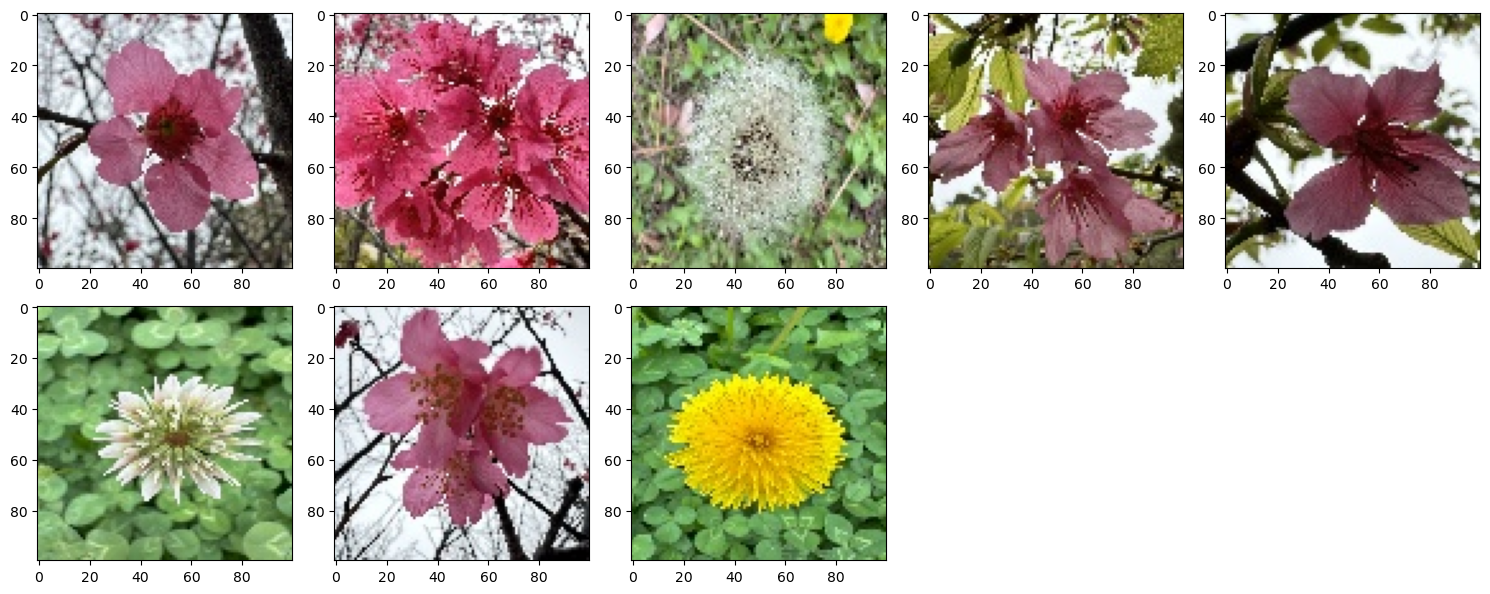

In [69]:
day_images = remove_night_images(resized_images, inplace=False)
display_images(day_images)

### Remove all images that are not pink flowers

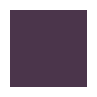

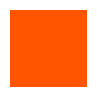

In [70]:
display_color_hsv([150, 75, 75]) 
display_color_hsv([190, 255, 255]) 

In [71]:
# Function to remove images that do not have a pink flower
def remove_non_pink_flower_images(images, threshold=0.1, inplace=False):
    def has_pink_flower(image):
        hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
        
        # Define lower and upper bounds for pink color in HSV space
        lower_pink = np.array([150, 75, 75])
        upper_pink = np.array([190, 255, 255])
        
        # Create a mask for pink areas
        pink_mask = cv.inRange(hsv_image, lower_pink, upper_pink)
        
        # Check if the image has enough pink pixels
        pink_percentage = np.mean(pink_mask > 0)
        
        # Return True if a significant portion of the image is pink
        return pink_percentage > threshold 

    if inplace:
        images[:] = [image for image in images if has_pink_flower(image)]
    else:
        return [image for image in images if has_pink_flower(image)]

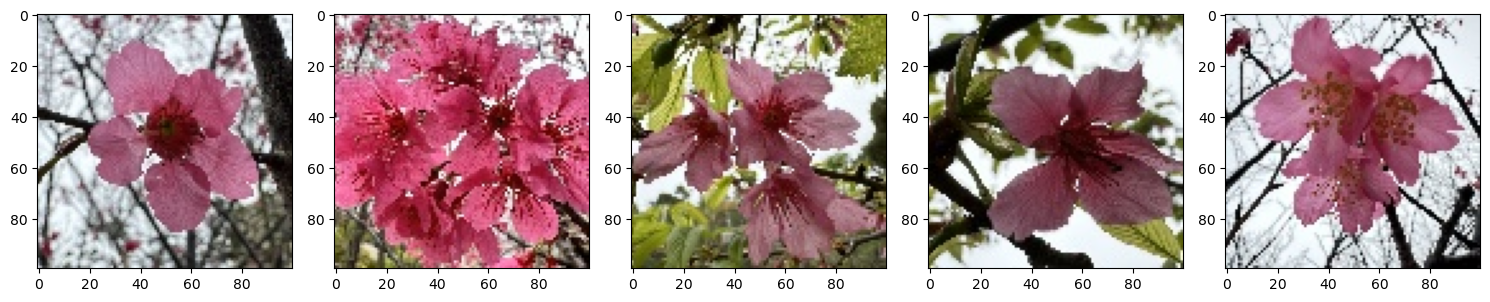

In [72]:
pink_flower_images = remove_non_pink_flower_images(day_images, 0.1, inplace=False)
display_images(pink_flower_images)

# Guide Questions

### 1. What mathematical or statistical bases have you considered when developing your function?

**Daytime Images**
- The HSV Color Space particularly the V (Brightness) channel
  - the V channel represents the brightness or intensity of the image. A higher value in the V channel indicates a brighter image, while lower values indicate a darker image which I think is useful for detecting day time and night time in images.
- Global Thresholding
  - To determine whether the image is taken during the day or night, a global thresholding technique is used on the V channel. This binary thresholding approach divides the image into two parts: bright and dark areas.
  - I used a default threshold value of 127 to separate bright and dark regions which is based on the [OpenCV documentation](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html).
- Mean Brightness
  - The mean value of the V channel gives a statistical measure of the average brightness in the image. This is used to compare with the threshold to determine if the image is likely taken during the day (if the brightness exceeds the threshold).

**Pink Flower Images**
- HSV Color Space particularly the H (Hue) channel
  - The H (Hue) channel in the HSV color space is key to detecting specific colors. Pink hues fall within a certain range in the HSV space, typically around 150 to 190 degrees, based on experimentation in my case.
- Color Masking
  - Using the inRange function, the algorithm creates a binary mask where pixels within the specified pink range are set to 1, and all other pixels are set to 0. This mask isolates the pink regions in the image.
- Pink Pixel Ratio
  - The algorithm calculates the mean of the mask values, which is equivalent to finding the proportion of pixels in the image that fall within the defined pink hue range.

### 2. What are the challenges in re-orienting the images in this action item?

**Daytime Images**
- For daytime images, one challenge I encountered was selecting the appropriate thresholding method. I experimented with Otsu and adaptive thresholding, but both were difficult to implement in my case. I eventually settled on using the default global thresholding value from OpenCV, which worked well for this dataset. However, I recognize that this approach may not generalize well to unseen data, as the threshold was manually adjusted to fit this particular dataset.

**Pink Flower Images**
- For pink flower images, the main difficulty was determining the correct range for the hue values. I relied on the `display_color_hsv` function to visualize color patches and experimented with different ranges. Additionally, I had to manually adjust the threshold for the percentage of pink pixels considered significant. A challenge here is that this method might include images without pink flowers, as long as there is a substantial presence of pink in the image.

### 3. What can you suggest for automating such a task?

> In my current approach, I’m using relatively simple, threshold-based methods to filter images based on brightness (for day/night classification) and color content (for detecting pink flowers). While these methods are computationally efficient and easy to implement, they do have limitations, particularly when dealing with more complex image variations, lighting conditions, or subtle differences in color distribution.

> To improve the automation and accuracy of such tasks, I suggest moving toward more advanced techniques, particularly object detection algorithms powered by neural networks.

> Object detection algorithms, particularly those based on Convolutional Neural Networks (CNNs), offer a more robust solution for identifying specific objects or features, like flowers, in images. Instead of relying on simple color thresholds, a neural network can be trained to recognize pink flowers regardless of varying lighting conditions, backgrounds, or other complexities in the image.

# Data Enhancement

From the cleaned dataset, develop and apply a function that:
- Adjusts the exposure of the images based on the brightest image. (Hint: You may manually select the representative image and apply Gamma Correction)
- Adjusts the saturation of the images to match the saturation of the most saturated image. (Hint: You may manually select the representative image and apply Histogram Equalization and Channel Arithmetic)

### Function to adjust the exposure of the images based on the brightest image

In [73]:
# Function to adjust the exposure of a list of images based on the brightest image
def adjust_exposure(images):
    # Calculate the brightness of each image
    brightness_list = [calculate_brightness(img) for img in images]

    # Select the brightest image as the reference
    brightest_index = np.argmax(brightness_list)
    brightest_img_brightness = brightness_list[brightest_index]

    # Adjust each image using gamma correction based on the brightest image
    adjusted_images = []
    for img in images:
        img_brightness = calculate_brightness(img)

        # Calculate gamma to adjust exposure
        gamma = brightest_img_brightness / img_brightness
        adjusted_img = gamma_correction(img, gamma)
        adjusted_images.append(adjusted_img)

    return adjusted_images

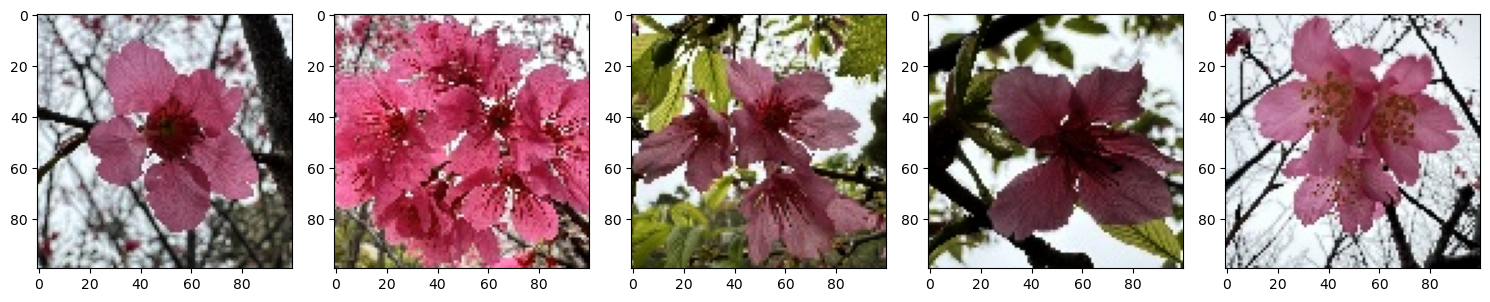

In [74]:
adjusted_exposure_images = adjust_exposure(pink_flower_images)
display_images(adjusted_exposure_images)

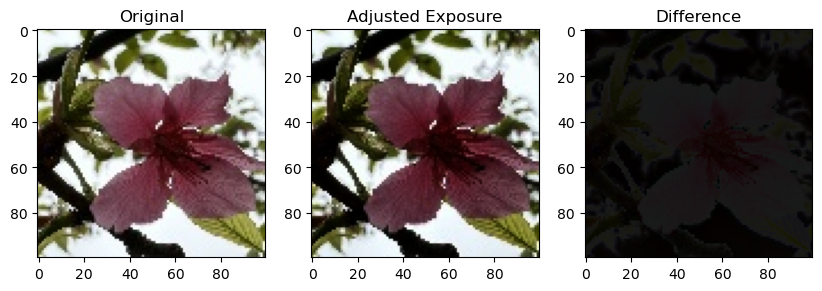

In [75]:
image_difference(pink_flower_images[3], adjusted_exposure_images[3], "Original", "Adjusted Exposure")

### Function to adjust the saturation of the images to match the saturation of the most saturated image

In [76]:
# Function to  adjust the saturation of images to match the saturation of the most saturated image
def match_saturation(images):
    # Find the most saturated image
    max_avg_saturation = 0
    most_saturated_hsv = None

    for img in images:
        hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
        # Calculate average saturation
        avg_saturation = np.mean(hsv_img[:, :, 1])
        # Update the most saturated image
        if avg_saturation > max_avg_saturation:
            max_avg_saturation = avg_saturation
            most_saturated_hsv = hsv_img

    # Use the most saturated image as the reference
    reference_saturation = most_saturated_hsv[:, :, 1]

    # Apply Histogram Equalization to match saturation
    adjusted_images = []
    for img in images:
        hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
        # Perform histogram equalization on the saturation channel
        h, s, v = cv.split(hsv_img)
        s_eq = cv.equalizeHist(s)
        
        # Adjust the current image's saturation based on the reference image
        scaling_factor = np.mean(reference_saturation) / np.mean(s_eq)
        s_scaled = cv.normalize(s_eq * scaling_factor, None, 0, 255, cv.NORM_MINMAX)

        # Merge the channels back
        hsv_adjusted = cv.merge([h, s_scaled.astype(np.uint8), v])
        rgb_adjusted = cv.cvtColor(hsv_adjusted, cv.COLOR_HSV2RGB)

        # Store the adjusted image
        adjusted_images.append(rgb_adjusted)

    return adjusted_images

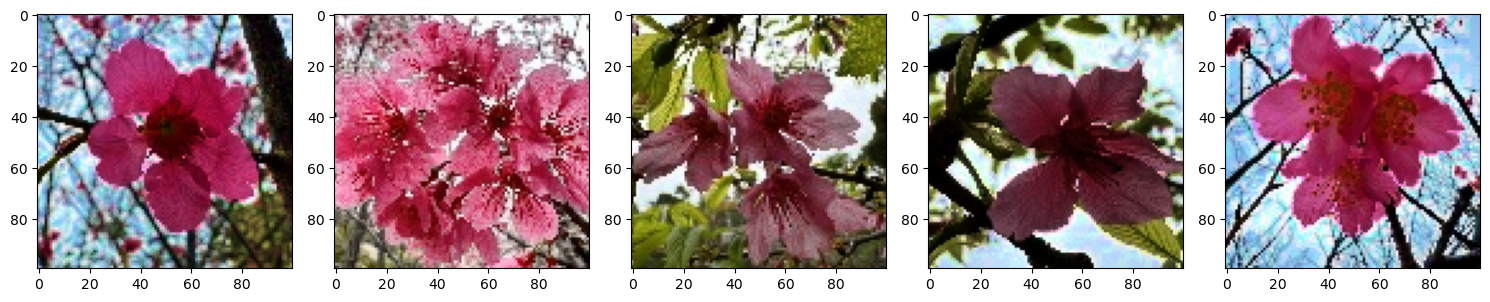

In [77]:
adjusted_saturation_images = match_saturation(adjusted_exposure_images)
display_images(adjusted_saturation_images)

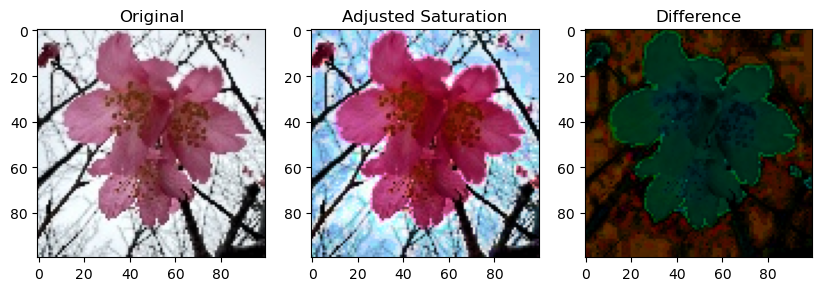

In [78]:
image_difference(adjusted_exposure_images[4], adjusted_saturation_images[4], "Original", "Adjusted Saturation")

# Modified Data Augmentation

Reuse the data augmentation functions from MP2 on geometric transformations and add the following augmentation techniques:
- Increase or decrease the saturation.

In [79]:
# Function to randomly place a black patch over a portion of the image
def random_black_patch(img, patch_size=(30, 30)):
    img_copy = img.copy()
    rows, cols, _ = img_copy.shape
    
    x = np.random.randint(0, cols - patch_size[1])
    y = np.random.randint(0, rows - patch_size[0])

    # Setting the value to 0 makes it black
    img_copy[y:y + patch_size[0], x:x + patch_size[1]] = 0  
    return img_copy

In [80]:
# Function to shift an image either sideward or upward
def shift_image(img, x=0, y=0):
    img_copy = img.copy()
    rows, cols, ch = img_copy.shape
    
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted_img = cv.warpAffine(img_copy, M, (cols, rows))
    return shifted_img

In [81]:
def rotate_image(img, theta=30, scale=1.0, center=None):
    img_copy = img.copy()
    rows, cols, ch = img_copy.shape
    
    # If no center is provided, use the geometric center of the image
    if center is None:
        center = ((cols - 1) / 2.0, (rows - 1) / 2.0)
    
    M = cv.getRotationMatrix2D(center, theta, scale)
    rotated_img = cv.warpAffine(img_copy, M, (cols, rows))
    
    return rotated_img

In [82]:
# Function to flip an image vertically or horizontally
def flip_image(img, flip_code=1):
    img_copy = img.copy()
    
    # flip_code: 1 = horizontal, 0 = vertical, -1 = both
    flipped_img = cv.flip(img_copy, flip_code)
    return flipped_img

### Increase or decrease the saturation

In [83]:
# Function to adjust the saturation of an RGB image
def adjust_saturation(img, scale=1.0):
    hsv_image = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(hsv_image)
    
    s = np.clip(s * scale, 0, 255).astype(np.uint8)
    
    # Merge the channels back and convert to RGB
    adjusted_hsv = cv.merge([h, s, v])
    adjusted_rgb = cv.cvtColor(adjusted_hsv, cv.COLOR_HSV2RGB)
    
    return adjusted_rgb

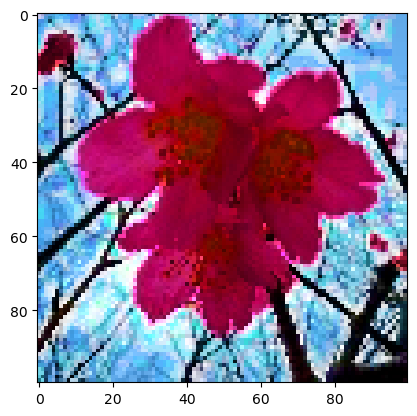

In [84]:
adjusted_image = adjust_saturation(adjusted_saturation_images[4], scale=1.5)  # Increase saturation by 50%
plt.imshow(adjusted_image)
plt.show()

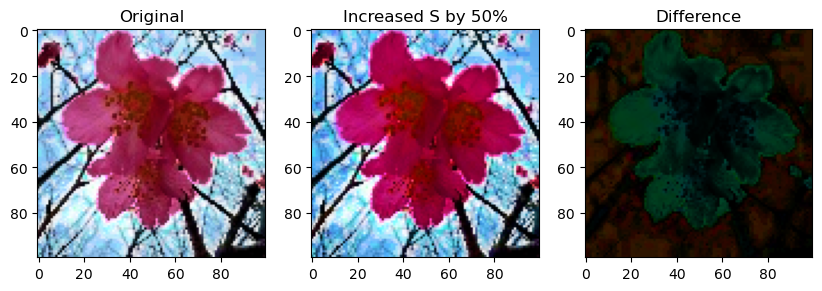

In [85]:
image_difference(adjusted_saturation_images[4], adjusted_image, "Original", "Increased S by 50%")

### Producing a new augmented dataset

In [86]:
# Function to apply augmentations and save augmented images
def augment_and_save_images(images, output_dir, augment_count=100):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    total_images = len(images)
    images_needed = augment_count - total_images

    augmented_images = []
    
    # Save the original images
    for idx, img in enumerate(images):
        # Save the original image
        img_name = f'original_{idx}.jpg'
        cv.imwrite(os.path.join(output_dir, img_name), cv.cvtColor(img, cv.COLOR_RGB2BGR))
        augmented_images.append(img)
    
    i = 0
    while len(augmented_images) < augment_count:
        # Randomly select an image from the original set
        img = images[np.random.randint(0, total_images)]

        # Keep track of whether any augmentation was applied
        augmentation_applied = False

        # Randomly apply transformations
        if np.random.choice([True, False]):
            img = random_black_patch(img, patch_size=(np.random.randint(25, 75), np.random.randint(25, 75)))
            augmentation_applied = True
        
        if np.random.choice([True, False]):
            img = shift_image(img, x=np.random.randint(-50, 50), y=np.random.randint(-50, 50))
            augmentation_applied = True
        
        if np.random.choice([True, False]):
            img = rotate_image(img, theta=np.random.randint(-75, 75), scale=1.0)
            augmentation_applied = True
        
        if np.random.choice([True, False]):
            img = flip_image(img, flip_code=np.random.choice([0, 1, -1]))
            augmentation_applied = True
        
        if np.random.choice([True, False]):
            img = adjust_saturation(img, scale=np.random.uniform(0, 2.0))
            augmentation_applied = True
            
        # If no augmentations were applied, randomly choose one augmentation to apply
        if not augmentation_applied:
            augmentation_functions = [
                lambda img: random_black_patch(img, patch_size=(np.random.randint(25, 75), np.random.randint(25, 75))),
                lambda img: shift_image(img, x=np.random.randint(-50, 50), y=np.random.randint(-50, 50)),
                lambda img: rotate_image(img, theta=np.random.randint(-75, 75), scale=1.0),
                lambda img: flip_image(img, flip_code=np.random.choice([0, 1, -1])),
                lambda img: adjust_saturation(img, scale=np.random.uniform(0, 2.0))
            ]
            img = np.random.choice(augmentation_functions)(img)

        # Save the augmented image
        img_name = f'augmented_{i}.jpg'
        cv.imwrite(os.path.join(output_dir, img_name), cv.cvtColor(img, cv.COLOR_RGB2BGR))
        augmented_images.append(img)
        i += 1
    
    print(f"Created {len(augmented_images)} images and saved them to {output_dir}")
    
    return augmented_images


In [87]:
# Apply to the original (resized) images
augmented_dir = 'augmented_images'

augmented_images = augment_and_save_images(resized_images, augmented_dir, augment_count=100)

Created 100 images and saved them to augmented_images
